## Perkenalan

Nama: Sivi Almanaf Ali Shahab
Batch: 006

**Objective**

Memprediksi seseorang mempunyai resiko serangan jantung yang lebih besar dengan berdasarkan data yang kita gunakan


**About data set**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

**Attribute Information**

1) age

2) sex

3) chest pain type (4 values)


4) resting blood pressure

5) serum cholestoral in mg/dl

6) fasting blood sugar > 120 mg/dl

7) resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11) the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14) target: 0= less chance of heart attack 1= more chance of heart attack

Dataset is taken for learning purpose. Source of the data : https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Judul 

**Health Care Data Set on Heart Attack Possibility**

## Import pustaka yang dibutuhkan

In [33]:
import opendatasets as od
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Loading

download data di link berikut ini https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility?select=heart.csv

In [34]:
# data yang didownload disimpan pada folder dataset
data = pd.read_csv("./dataset/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
# Check data train yang akan kita gunakan
data_train = data.iloc[:, :-1]
data_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

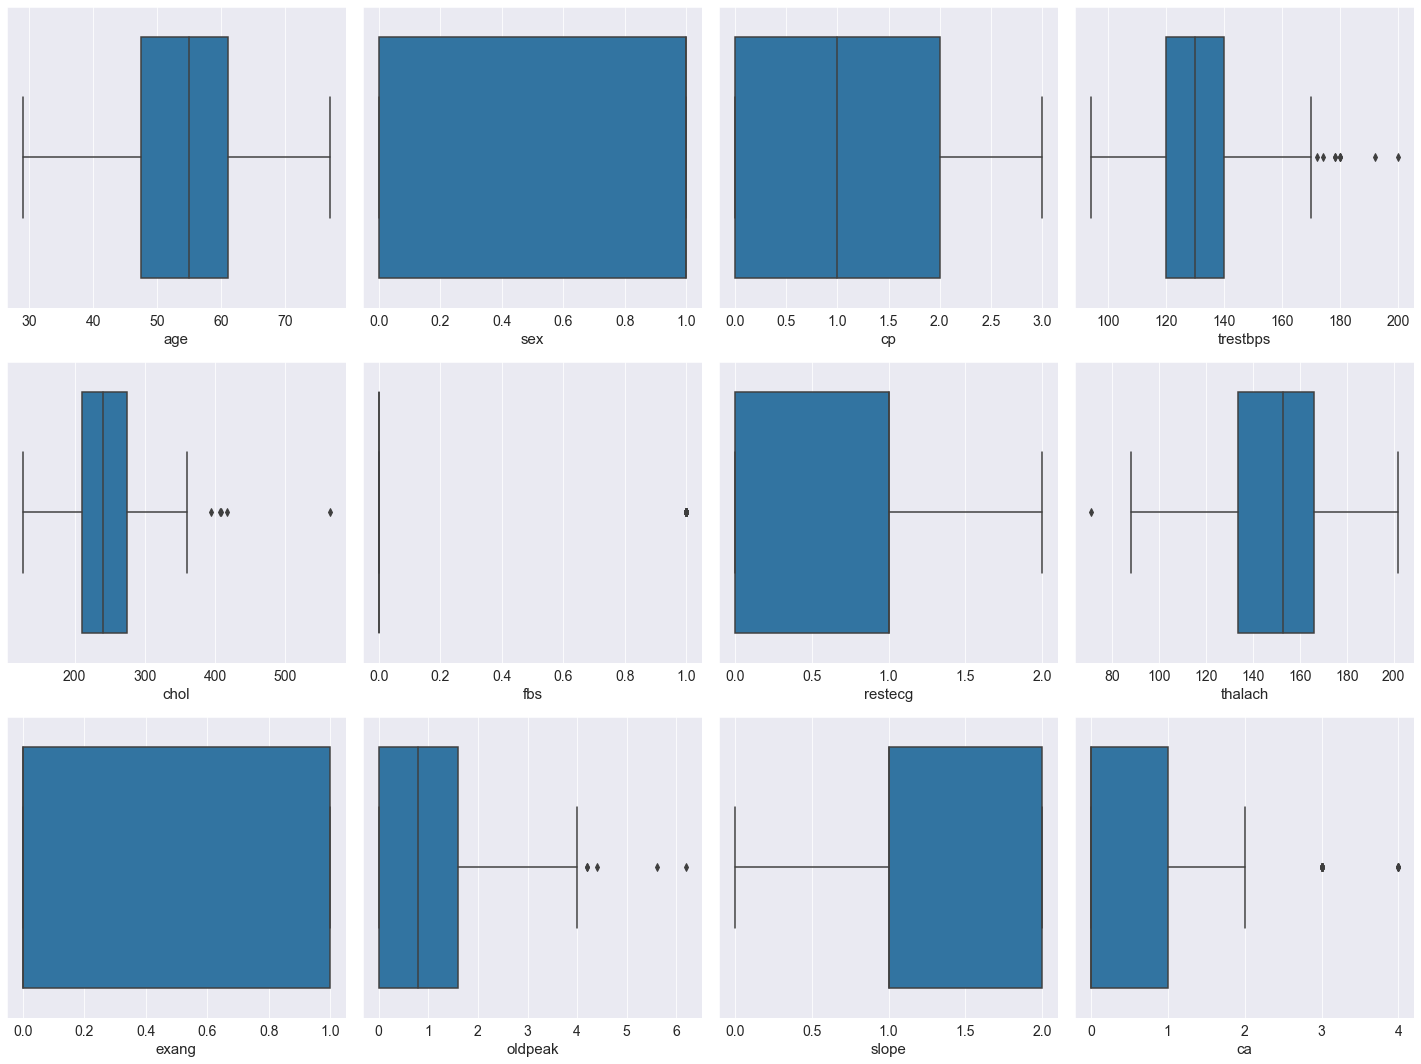

In [36]:
# Boxplot untuk mengetahui outlier dan distribusi data
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data_train:
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(data_train[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Terdapat beberapa outlier yang ditampilkan namun kita bisa abaikan karena selanjutnya kita gunakan algorithms berbasis Tree

In [37]:
# Check fata info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


berdasarkan data info diatas kita bisa lihat tipe data dari masing-masing features dan kita bisa simpulkan tidak ada data yang miss 

In [38]:
# Check statistic description
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Cleaning

#### Feature Selection

Kita akan menggunakan Mutual Information untuk melihat feature mana yang memiliki nilai sensitifitas yang tinggi terhadap variabel target 

In [39]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, data.target)

In [40]:
 # Numerical Input, Categorical Output
df_mi_num = data_train.apply(calculate_mi)
df_mi_num = df_mi_num.sort_values(ascending=False).to_frame(name='MI')
print('-'*100)
print('#Mutual Information Numerical Input, Numerical Output#')
print(df_mi_num)
print('-'*100)

----------------------------------------------------------------------------------------------------
#Mutual Information Numerical Input, Numerical Output#
                MI
chol      0.387980
thalach   0.232272
oldpeak   0.175635
thal      0.147814
cp        0.141817
ca        0.128896
exang     0.098573
trestbps  0.097337
age       0.093786
slope     0.080983
sex       0.040992
restecg   0.016687
fbs       0.000392
----------------------------------------------------------------------------------------------------


C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


Dari Hasil Mutual Information diatas kita eliminasi feature 'fbs' dan 'restecg' karena memiliki nilai MI yang paling rendah

In [41]:
# Copy data 
df = data.copy()

In [42]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [43]:
df_new = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]
df_new.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


## Explorasi Data

Proporsi data target untuk cek inbalanced data

<AxesSubplot:>

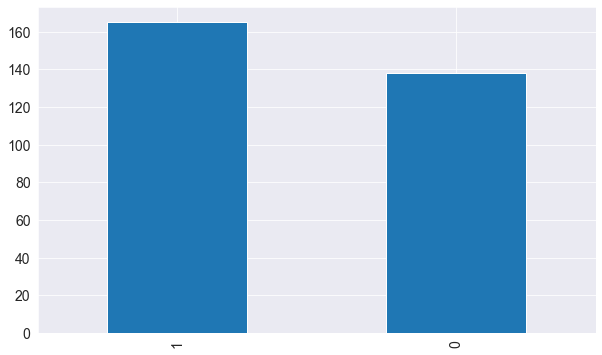

In [44]:
df_new.target.value_counts().plot(kind='bar')

In [45]:
df_new.target.value_counts()/len(df_new.target)

1    0.544554
0    0.455446
Name: target, dtype: float64

dari proporsi data diatas data dapat dikategorikan balanced karena presentasinya 54.5% dan 45.5% cukup seimbang

In [96]:
df_new.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


Selanjutnya kita akan fokus pada data yang memiliki potensi serangan jantung lebih besar yaitu target==1

In [98]:
df_new_yes = df_new[(df_new['target']==1)]
df_new_yes.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='age', ylabel='Count'>

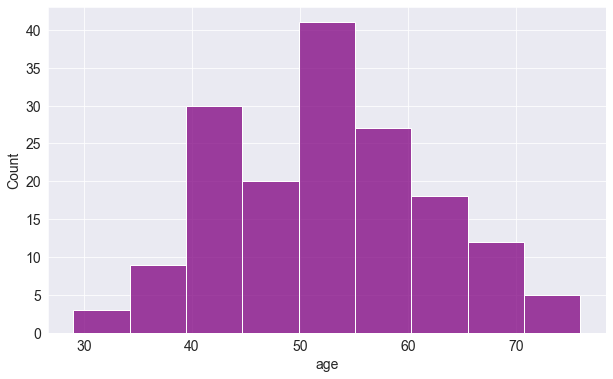

In [99]:
sns.histplot(data=df_new_yes, x='age',color='purple')

Dari Histogram diatas rentang usia dari 40-60 memiliki jumlah peluang yang lebih besar terkena serangan jantung

In [100]:
sex_heart_attack= df_new_yes['sex'].value_counts()

In [101]:
labels = df_new_yes['sex'].unique()
labels

array([1, 0], dtype=int64)

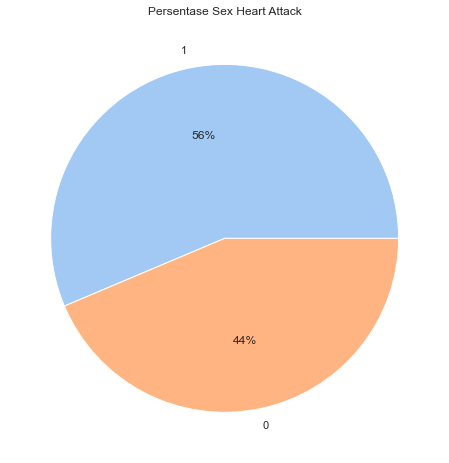

In [104]:
colors = sns.color_palette('pastel')[0:2]
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
plt.pie(sex_heart_attack, labels= labels, colors=colors, autopct='%.0f%%')
plt.title("Persentase Sex Heart Attack")
plt.show()

Berdasarkan pie chart diatas resiko terkena serangan jantung 56% adalah 'sex'==1 dan 44% 'sex'==0

In [106]:
cp_heart_attack= df_new_yes['cp'].value_counts()
labels_cp = df_new_yes['cp'].unique()
labels_cp

array([3, 2, 1, 0], dtype=int64)

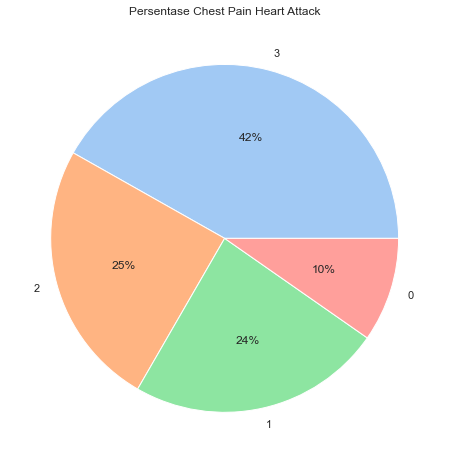

In [107]:
colors = sns.color_palette('pastel')[0:5]
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
plt.pie(cp_heart_attack, labels= labels_cp, colors=colors, autopct='%.0f%%')
plt.title("Persentase Chest Pain Heart Attack")
plt.show()

Berdasarkan pie chart diatas resiko terkena serangan jantung 42% adalah 'cp'==3, 25% adalah 'cp'==2, 24% adalah 'cp'==1, dan 10% adalah 'cp'==0

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

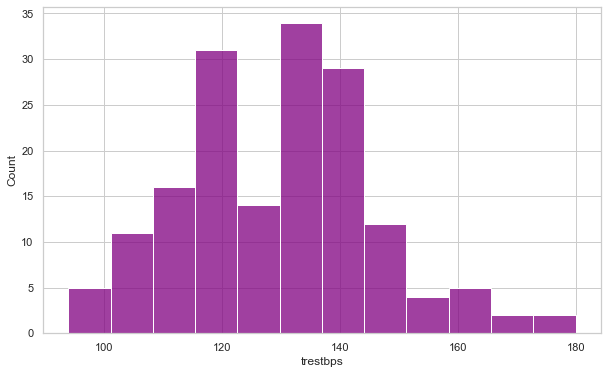

In [108]:
sns.histplot(data=df_new_yes, x='trestbps',color='purple')

Berdasarkan histogram diatas resiko terkena serangan jantung lebih besar dilihat dari feature trestbps = resting blood pressure adalah di interval 110-150

## Data Preprocessing

Split data menjadi independent dan dependent data

In [46]:
X = df_new.drop(['target'], axis=1)
y = df_new['target']

Bagi data menjadi data train dan data test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [58]:
numerical_pipeline = Pipeline([
                               ("scaler", MinMaxScaler())
                                ])

In [50]:
df_new.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


In [52]:
df_new['slope'].unique()

array([0, 2, 1], dtype=int64)

In [56]:
df_new['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [55]:
df_new['exang'].unique()

array([0, 1], dtype=int64)

In [54]:
df_new['slope'].unique()

array([0, 2, 1], dtype=int64)

In [59]:
preprocessor = ColumnTransformer([
                                  ("numeric", numerical_pipeline, ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])                

])

## Pendefinisian Model

#### Baseline Model Decision Tree dan Random Forest

Baseline Model adalah model dasar yang akan kita gunakan dengan menggunakan default hyperparameter nya

##### Decision Tree

In [60]:
# Define mode Decision Tree
tree = DecisionTreeClassifier()

pipeline_tree = Pipeline([
                      ("prep_tree", preprocessor),
                      ("algo_tree", tree)
                      ])


##### Random forest

In [61]:
rf = RandomForestClassifier()

pipeline_rf = Pipeline([
                      ("prep_rf", preprocessor),
                      ("algo_rf", rf)
                      ])

#### Hyperparameter Tuning Decision Tree dan Random Forest

##### Decision Tree

- Kita akan menggunakan fungsi untuk mengukur kualitas split yaitu gini dan entropy (hanya ada dua tipe)
- max_depth range 1 sampe 10 kita tidak ingin model kita overfit
- minimun sple split digunakan untuk split di internal node
- min sample leaf adalah jumlah daun yang kita gunakan kita pilih range 1 sampe 5


In [75]:
parameter_tree = {
    "algo_tree__criterion":  ['gini', 'entropy'],
    "algo_tree__max_depth": range(1, 10),
    "algo_tree__min_samples_split": range(1, 10),
    "algo_tree__min_samples_leaf": range(1, 5) 
}


In [76]:
model_best_tree = GridSearchCV(pipeline_tree, param_grid= parameter_tree, cv = 5, n_jobs=-1, verbose=1)

##### Random forest

- Kita Pilih jumlah pohon(n_estimators) 10, 100, dan 1000 untuk menguji model kita
- menggunakan max_feature: sqrt adalah tidak semua pohon yang digunakan hanya akar kuadrat dari total fitur,
 max_feature: log2 alah tidak semua pohon yang digunakan hanya log 2dari total fitur

In [118]:
parameter_rf = {
    "algo_rf__n_estimators":  [10, 100, 1000],
    "algo_rf__max_features": ['sqrt', 'log2']
}

In [119]:
model_best_rf = GridSearchCV(pipeline_rf, param_grid= parameter_rf, cv = 5, n_jobs=-1, verbose=1)

## Pelatihan Model

##### Decision Tree

In [62]:
model_train_tree = pipeline_tree.fit(X_train, y_train)
model_train_tree

Pipeline(steps=[('prep_tree',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('algo_tree', DecisionTreeClassifier())])

##### Random forest

In [63]:
model_train_rf = pipeline_rf.fit(X_train, y_train)
model_train_rf

Pipeline(steps=[('prep_rf',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('algo_rf', RandomForestClassifier())])

##### Train Model dengan Best Model dari Tuning

In [117]:
model_tree = model_best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\si

In [122]:
# summarize results
print("Best: %f using %s" % (model_tree.best_score_, model_tree.best_params_))
means = model_tree.cv_results_['mean_test_score']
stds = model_tree.cv_results_['std_test_score']
params = model_tree.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.710629 using {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 2, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 2}
nan (nan) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 1, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 1}
0.681548 (0.037931) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 1, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 2}
0.681548 (0.037931) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 1, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 3}
0.681548 (0.037931) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 1, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 4}
0.681548 (0.037931) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 1, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 5}
0.681548 (0.037931) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 1,

In [123]:
model_tree.best_params_

{'algo_tree__criterion': 'gini',
 'algo_tree__max_depth': 2,
 'algo_tree__min_samples_leaf': 1,
 'algo_tree__min_samples_split': 2}

Dari HyperParameter diatas model terbaik adalah:

{'algo_tree__criterion': 'gini',
 'algo_tree__max_depth': 2,
 'algo_tree__min_samples_leaf': 1,
 'algo_tree__min_samples_split': 2}

In [120]:
model_rf = model_best_rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [121]:
# summarize results
print("Best: %f using %s" % (model_rf.best_score_, model_rf.best_params_))
means = model_rf.cv_results_['mean_test_score']
stds = model_rf.cv_results_['std_test_score']
params = model_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.710459 using {'algo_rf__max_features': 'log2', 'algo_rf__n_estimators': 100}
0.673639 (0.047037) with: {'algo_rf__max_features': 'sqrt', 'algo_rf__n_estimators': 10}
0.702211 (0.044380) with: {'algo_rf__max_features': 'sqrt', 'algo_rf__n_estimators': 100}
0.702381 (0.052436) with: {'algo_rf__max_features': 'sqrt', 'algo_rf__n_estimators': 1000}
0.665306 (0.027182) with: {'algo_rf__max_features': 'log2', 'algo_rf__n_estimators': 10}
0.710459 (0.056999) with: {'algo_rf__max_features': 'log2', 'algo_rf__n_estimators': 100}
0.685969 (0.049615) with: {'algo_rf__max_features': 'log2', 'algo_rf__n_estimators': 1000}


Dari HyperParameter diatas model terbaik adalah:

{'algo_rf__max_features': 'log2', 'algo_rf__n_estimators': 100}

## Evaluasi Model

#### Evaluasi Baseline Model Decision Tree dan Random Forest

**Decision Tree**

In [64]:
evaluasi_model_tree = pipeline_tree.score(X_test, y_test)
evaluasi_model_tree

0.6229508196721312

In [71]:
y_pred_tree = pipeline_tree.predict(X_test)

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.58      0.68      0.62        28
           1       0.68      0.58      0.62        33

    accuracy                           0.62        61
   macro avg       0.63      0.63      0.62        61
weighted avg       0.63      0.62      0.62        61



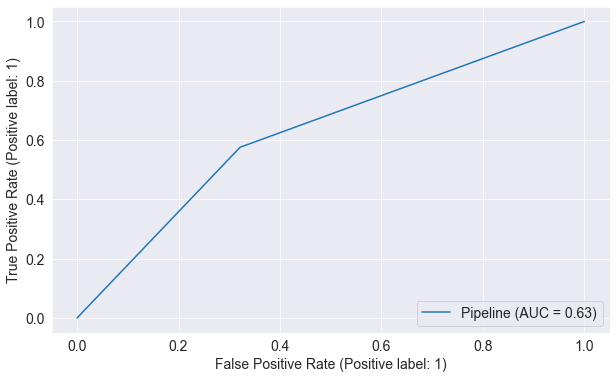

In [72]:
RocCurveDisplay.from_estimator(pipeline_tree, X_test, y_test)

**Random Forest**

In [73]:
evaluasi_model_rf = pipeline_rf.score(X_test, y_test)
evaluasi_model_rf

0.7049180327868853

In [74]:
y_pred_rf = pipeline_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        28
           1       0.76      0.67      0.71        33

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



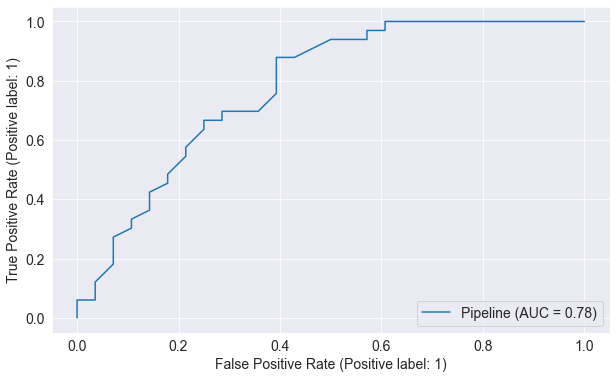

In [70]:
RocCurveDisplay.from_estimator(pipeline_rf, X_test, y_test)

#### Evaluasi Best Model Decision Tree dan Random Forest

Evaluasi Best Model ini berdasarkan model yang telah kita gunakan Hypeparameter dan menghasilkan model yang terbaik

**Decision Tree**

In [89]:
evaluasi_model_best_tree = model_tree.score(X_test, y_test)
evaluasi_model_best_tree

0.7377049180327869

In [88]:
y_pred_best_tree = model_tree.predict(X_test)

print(classification_report(y_test, y_pred_best_tree))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68        28
           1       0.72      0.85      0.78        33

    accuracy                           0.74        61
   macro avg       0.75      0.73      0.73        61
weighted avg       0.74      0.74      0.73        61



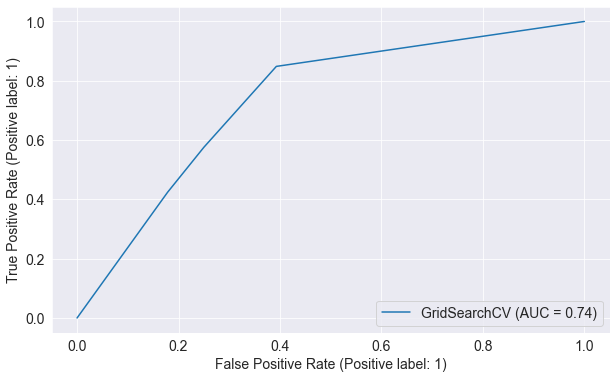

In [90]:
RocCurveDisplay.from_estimator(model_tree, X_test, y_test)

**Random Forest**

In [92]:
evaluasi_model_best_rf = model_rf.score(X_test, y_test)
evaluasi_model_best_rf

0.7704918032786885

In [94]:
y_pred_best_rf = model_rf.predict(X_test)

print(classification_report(y_test, y_pred_best_rf))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



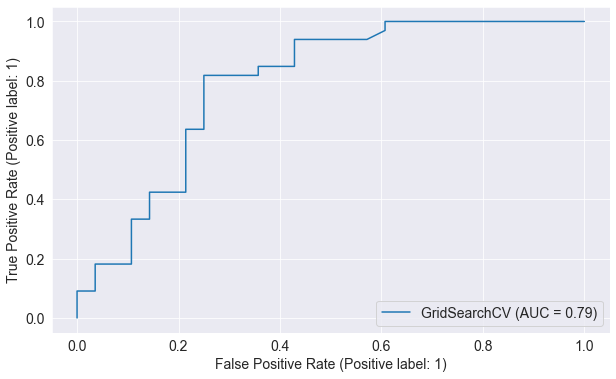

In [95]:
RocCurveDisplay.from_estimator(model_rf, X_test, y_test)

## Model Inference

Dalam bab Model Inference Berikut ini kita akan menggunakan best model yang diperoleh setelah melakukan tuning pada setiap model

In [111]:
# Check data yang akan kita gunakan
X_train.iloc[0:1]

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
269,56,1,0,130,283,103,1,1.6,0,0,3


In [113]:
# Create Random Data
data = [
        [50, 1, 2, 100, 300, 103, 1, 1, 1, 0, 3]
      ]
X_pred = pd.DataFrame(data, index=[1], columns=X.columns)
X_pred

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
1,50,1,2,100,300,103,1,1,1,0,3


**Decision Tree**

In [114]:
model_tree.predict(X_pred)

array([0], dtype=int64)

Dari data yang kita berikan model decision tree mempridiksi dengan hasil 0 artinya kurang memiliki resiko serangan jantung

**Random Forest**

In [115]:
model_rf.predict(X_pred)

array([0], dtype=int64)

Dari data yang kita berikan model random forest mempridiksi dengan hasil 0 artinya kurang memiliki resiko serangan jantung

## Pengambilan Kesimpulan

Berdasarkan dua Model yaitu Decision Tree dan Random Forest yang telah dilakukan hyperparameter tuning Random Forest memiliki score accuracy yang lebih tinggi dari pada Decision Tree yaitu 77% (RF) dibanding 73.7%(DT) artinya model kita masih perlu dilakukan optimize seperti jumlah data yang diperbanyak, melakukan uji coba dengan menggunakan model yang lain, mengganti hyperparamater dan lain sebagainya. Sehingga dapat disimpulkan dengan menggunakan RF sesorang dpat diprediksi memiliki resiko serangan jantung 77% sedangkan dengan DT dpat diprediksi memiliki resiko serangan jantung 73.7%